### About LBP

* Local Binary Pattern (LBP) is a simple yet very efficient texture operator which labels the pixels of an image by thresholding the neighborhood of each pixel and considers the result as a binary number.

* Now that we know a little more about face recognition and the LBPH, let’s go further and see the steps of the algorithm:
* Parameters: the LBPH uses 4 parameters:
> * Radius: the radius is used to build the circular local binary pattern and represents the radius around the central pixel. It is usually set to 1.
> * Neighbors: the number of sample points to build the circular local binary pattern. Keep in mind: the more sample points you include, the higher the computational cost. It is usually set to 8.
> * Grid X: the number of cells in the horizontal direction. The more cells, the finer the grid, the higher the dimensionality of the resulting feature vector. It is usually set to 8.
> * Grid Y: the number of cells in the vertical direction. The more cells, the finer the grid, the higher the dimensionality of the resulting feature vector. It is usually set to 8.

&nbsp;

&nbsp;

### LBP Step-by-Step

#### step 1 : Creating multiple 3x3 pixels cell across the image
* <span style='background:yellow'>Algorithm generates decimal values of each cell based on 3x3 center threshold value.</span> 

* ![title](images/lbp.png)

* Based on the image above, let’s break it into several small steps so we can understand it easily:
* First we make facial image into grayscale(<span style='background:yellow'>because, GrayScale Image has one dimension (channel) image, where RGB Image has three dimension(channel) image, so its easy to to make algorithms steps in single dimensional image(greyscale having values from 0(black)-255(white), slowly black to white no other colors)</span>.
* We can get part of this image as a window of 3x3 pixels.(<span style='background:yellow'>Across whole image, we get like this small patches 3x3 pixels(i.e., 3x3 matrix with 1 threshold value and 8 neighbours value) and get binary values using middle threshold value)</span>
* It can also be represented as a 3x3 matrix containing the intensity of each pixel (0~255).
* Then, we need to take the central value of the matrix to be used as the threshold.
* This value will be used to define the new values from the 8 neighbors.
* For each neighbor of the central value (threshold), we set a new binary value. We set 1 for values equal or higher than the threshold and 0 for values lower than the threshold.
* Now, the matrix will contain only binary values (ignoring the central value). We need to concatenate each binary value from each position from the matrix line by line into a new binary value (e.g. 10001101). Note: some authors use other approaches to concatenate the binary values (e.g. clockwise direction), but the final result will be the same.
* Then, we convert this binary value to a decimal value, like below and set it to the central value of the matrix, which is actually a pixel from the original image.
* ![title](images/decimal_value.png)
* <span style='background:yellow'><b>Note :</b> Binary values are changing into decimal(because, for 8 binary values-11111111 max decimal value is 255), so we can think if all 8 neighbour values are greater than threshold then it is all are 11111111 hence decimal value is 255, so color would white.</span>
* At the end of this procedure (LBP procedure), we have a new image which represents better the characteristics of the original image.

&nbsp;

&nbsp;

#### step 2 : Extracting the Histograms: 
* <span style='background:yellow'>Algorithm create grids using Grid X and Grid Y parameters and in each grid multiple 3x3 cell exists and it means multiple decimal values(i.e., decimal value 0-255) for multiple 3x3 cell in each grid, then algorithm creates one histogram per each grid and final image histogram is concatination of whole grids histograms.</span>

* Now, using the image generated in the last step, we can use the Grid X and Grid Y parameters to divide the image into multiple grids, as can be seen in the following image:
* ![title](images/lbp_histogram.png)
* Based on the image above, we can extract the histogram of each region as follows:
* As we have an image in grayscale, each histogram (from each grid) will contain only 256 positions (0~255) representing the occurrences of each pixel intensity.
* Then, we need to concatenate each histogram to create a new and bigger histogram. Supposing we have 8x8 grids, we will have 8x8x256=16.384 positions in the final histogram. The final histogram represents the characteristics of the image original image.

&nbsp;

&nbsp;

#### step 3 : Performing the face recognition: 

* In this step, the algorithm is already trained. Each histogram created is used to represent each image from the training dataset. So, given an input image, we perform the steps again for this new image and creates a histogram which represents the image.
* <span style='background:yellow'>So to find the image that matches the input image we just need to compare two histograms and return the image with the closest histogram.</span>
* We can use various approaches to compare the histograms (calculate the distance between two histograms), for example: euclidean distance, chi-square, absolute value, etc. In this example, we can use the Euclidean distance (which is quite known) based on the following formula:
* ![title](images/lbp_euclidean_dist.png)
* Note : To find distance between two histograms, we make each histogram as one data point vector. 
* <span style='background:yellow'>i.e., We get histogram frequency counts per bin as percentages and by considering all bins percentages, it looks like data point vector per histogram.(using np.histogram([1,2,1], bins=[0,1,2,3], density=True) we get hist. freq percentages vector), then we use these data vectors for checking two image histograms similarity/distance between using euclidean distance formula</span>
> * Ex:-
> * hist_2, _ = np.histogram([1,2,1], bins=[0,1,2,3], density=True)
> * axes.hist([1,2,1], bins=[0,1,2,3], density=True)
> * ![title](images/lbp_hist_vector.png)
> * The input values are 1, 2 and 1. Therefore, bin "1 to 2" contains two occurrences (the two 1 values), and bin "2 to 3" contains one occurrence (the 2). These results are in the first item in the returned tuple: array([0, 2, 1]). Since the bins here are of equal width, you can use the number of occurrences for the height of each bar. When drawn, you would have:
> * a bar of height 0 for range/bin [0,1] on the X-axis,
> * a bar of height 2 for range/bin [1,2],
> * a bar of height 1 for range/bin [2,3].

&nbsp;

&nbsp;

&nbsp;

### Importing Libraries

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from skimage import data, io, filters, color
from skimage.feature import local_binary_pattern

%matplotlib inline

&nbsp;

&nbsp;

### Sample Images

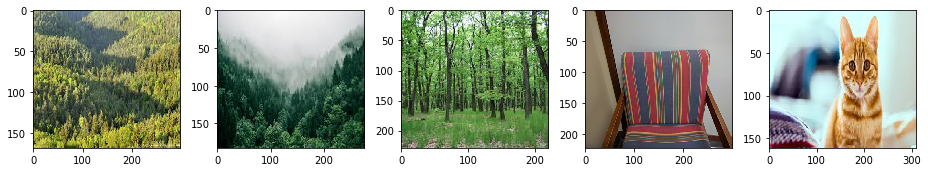

In [70]:
forest1 = "/Users/rock/Data Science/Practice/images/forest1.jpeg"
forest2 = "/Users/rock/Data Science/Practice/images/forest2.jpeg"
forest3 = "/Users/rock/Data Science/Practice/images/forest3.jpeg"
chair = "/Users/rock/Data Science/Practice/images/chair.jpeg"
cat = "/Users/rock/Data Science/Practice/images/cat.jpeg"

i_forest1 = io.imread(fname = forest1)
i_forest2 = io.imread(fname = forest2)
i_forest3 = io.imread(fname = forest3)
i_chair = io.imread(fname = chair)
i_cat = io.imread(fname = cat)

#Visualizing Sample Images
fig,axes = plt.subplots(nrows=1, ncols=5, figsize=(13,2.5))
axes[0].imshow(i_forest1,aspect="auto")
axes[1].imshow(i_forest2,aspect="auto")
axes[2].imshow(i_forest3,aspect="auto")
axes[3].imshow(i_chair,aspect="auto")
axes[4].imshow(i_cat,aspect="auto")

plt.tight_layout()
plt.show()

&nbsp;

&nbsp;

### Local Binary Pattern for : forest1.jpeg

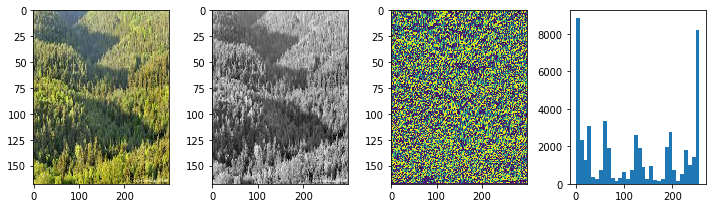

In [71]:
img = color.rgb2gray(i_forest1)
patterns = local_binary_pattern(img, 8, 1)#8 min points in circle and 1 radius i.e., 3*3 matrix pixel in lbp example
hist_forest1, _ = np.histogram(patterns, bins=np.arange(2**8 + 1), density=True)


#Visualizing Local Binary Images
fig,axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
axes[0].imshow(i_forest1,aspect="auto")
axes[1].imshow(img,aspect="auto",cmap = plt.get_cmap('gray'))
axes[2].imshow(patterns,aspect="auto")
axes[3].hist(patterns.ravel(),bins=32, range=[0, 256])

plt.tight_layout()
plt.show()

#print(hist_forest1)

&nbsp;

### Local Binary Pattern for : forest3.jpeg

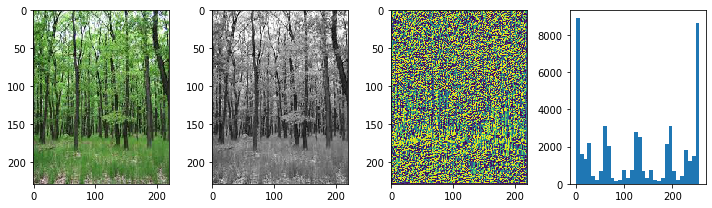

In [72]:
img = color.rgb2gray(i_forest3)
patterns = local_binary_pattern(img, 8, 1)#8 min points in circle and 1 radius i.e., 3*3 matrix pixel in lbp example
hist_forest3, _ = np.histogram(patterns, bins=np.arange(2**8 + 1), density=True)


#Visualizing Local Binary Images
fig,axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
axes[0].imshow(i_forest3,aspect="auto")
axes[1].imshow(img,aspect="auto",cmap = plt.get_cmap('gray'))
axes[2].imshow(patterns,aspect="auto")
axes[3].hist(patterns.ravel(),bins=32, range=[0, 256])

plt.tight_layout()
plt.show()

&nbsp;

### Local Binary Pattern for : chair.jpeg

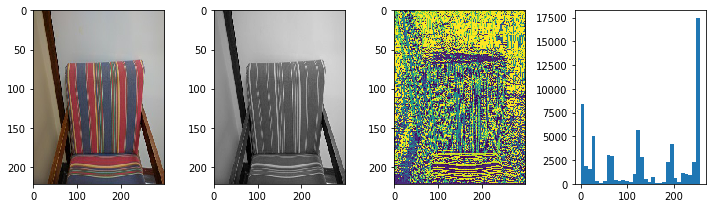

In [73]:
img = color.rgb2gray(i_chair)
patterns = local_binary_pattern(img, 8, 1)#8 min points in circle and 1 radius i.e., 3*3 matrix pixel in lbp example
hist_chair, _ = np.histogram(patterns, bins=np.arange(2**8 + 1), density=True)


#Visualizing Local Binary Images
fig,axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
axes[0].imshow(i_chair,aspect="auto")
axes[1].imshow(img,aspect="auto",cmap = plt.get_cmap('gray'))
axes[2].imshow(patterns,aspect="auto")
axes[3].hist(patterns.ravel(),bins=32, range=[0, 256])

plt.tight_layout()
plt.show()

&nbsp;

&nbsp;

### Similarity between Sample images

In [67]:
print('Distance between Forest1 and Forest1 histograms : %.3f'%euclidean(hist_forest1, hist_forest1))
print('Distance between Forest1 and Forest3 histograms : %.3f'%euclidean(hist_forest1, hist_forest3))
print('Distance between Forest1 and chair histograms : %.3f'%euclidean(hist_forest1, hist_chair))

Distance between Forest1 and Forest1 histograms : 0.000
Distance between Forest1 and Forest3 histograms : 0.022
Distance between Forest1 and chair histograms : 0.139


### Key Note :
* From above values we can say that, Forest1 and Forest 3 images are near to each other, rather than Forest1 & chair images, which is correct.
* So our algorithm properly formed histograms and got good results.
* In some cases forest images has so much fog and less greenery(Forest2), in that case Forest 1 and Forest 2 will get some what high euclidean distance, becuase of less greenery in Forest 2 image than Forest 1 image. According to my understanding, in general, If most of the two images color matches then it would be mostly similar to each other according to algorithm logic & euclidean distance.